In [1]:
from matplotlib import pyplot as plt
import numpy as np

### theory data

In [37]:
THEORY_POWERS = [10, 50, 100]
THEORY_DELAYS = [10, 30, 50, 70, 90, 110]

def load_theory_result(power: int, delays=THEORY_DELAYS):

    dirmap = {
        10: "fig4a",
        50: "fig4b",
        100: "fig4c",
    }

    q_values = None
    intensities = []

    for delay in delays:
        file_path = f"{dirmap[power]}/rdp47_{power:03d}_{delay:03d}fs.txt"
        data = np.loadtxt(file_path)

        if q_values is not None:
            assert np.all(q_values == data[:,0] / 1e10)
        else:
            q_values = data[:,0] / 1e10

        intensities.append(data[:,1])

    data_stack = np.stack([q_values] + intensities)
    assert data_stack.shape[0] == len(delays) + 1

    return data_stack.T


def normalize(radial_profile, rng=(50, 340)):
    div = radial_profile[...,rng[0]:rng[1]].sum(-1)[...,None]
    return radial_profile / ( div + 1e-16)

In [17]:
theoretical_data = load_theory_result(100)
print(theoretical_data.shape)

(50, 7)


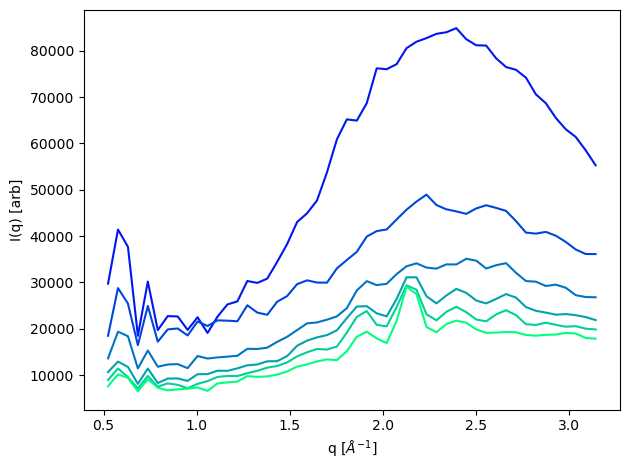

In [18]:
plt.figure()

for i,b in enumerate(THEORY_DELAYS):
    plt.plot(theoretical_data[:,0], theoretical_data[:,i+1], color=plt.cm.winter(b/np.array(THEORY_DELAYS).max()))

plt.xlabel('q [$\AA^{-1}]$')
plt.ylabel('I(q) [arb]')

plt.tight_layout()
plt.show()

### experimental data

In [5]:
experimental_data = np.loadtxt("../csvs/water_Iq_v_time.csv", delimiter=',')
print(experimental_data.shape)
EXPERIMENTAL_DELAYS = np.array([10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0])

(500, 12)


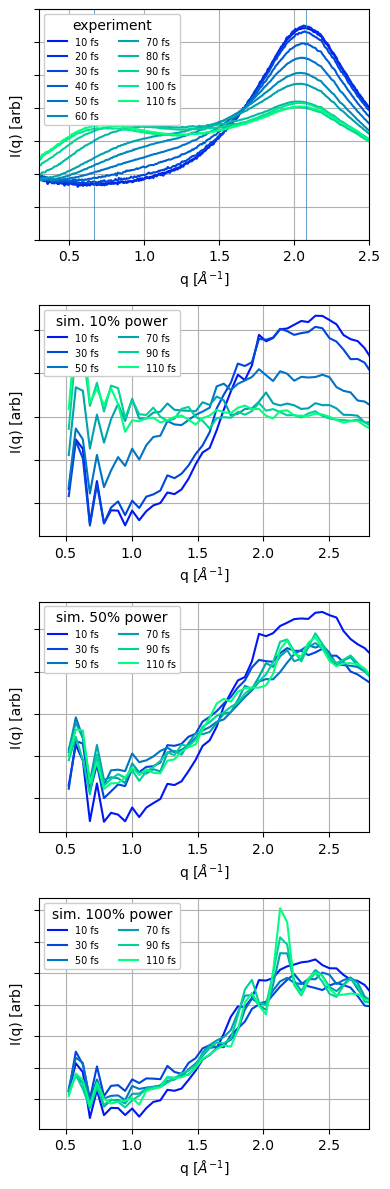

In [45]:
# RP vs Delay Time

# --- peak positions to monitor later (in array idx)
new_peak_pos = 90
wat_peak_pos = 280
XLIM = [0.3, 2.5]
GRID = True
NORMALIZE = True

# --- plotting
plt.figure(figsize=(4,3*4))

ax = plt.subplot(4, 1, 1)

for i,b in enumerate(EXPERIMENTAL_DELAYS):
    ax.plot(experimental_data[:,0], experimental_data[:,i+1], color=plt.cm.winter(b/EXPERIMENTAL_DELAYS.max()))

ax.set_xlabel('q [$\AA^{-1}]$')
ax.set_ylabel('I(q) [arb]')
ax.set_xlim(XLIM)
ax.set_ylim([0.0, 0.007])
ax.set_yticklabels([])
if GRID: ax.grid()

plt.vlines(
    [
        experimental_data[:,0][new_peak_pos],
        experimental_data[:,0][wat_peak_pos]
    ], 
    0.0, 0.007, lw=0.5
)

plt.legend(
    ['%d fs' % b for b in EXPERIMENTAL_DELAYS], 
    prop={'size': 7},
    ncol=2,
    framealpha=1.0,
    title="experiment"
)


for ax_i, theory_power in enumerate(THEORY_POWERS):

    ax = plt.subplot(4, 1, ax_i + 2)

    theoretical_data = load_theory_result(theory_power)

    for i,b in enumerate(THEORY_DELAYS):

        if NORMALIZE:
            ax.plot(
                theoretical_data[:,0],
                normalize(theoretical_data[:,i+1], rng=[0, -1]),
                color=plt.cm.winter(b/np.array(THEORY_DELAYS).max())
            )
        else:
            ax.plot(
                theoretical_data[:,0],
                theoretical_data[:,i+1],
                color=plt.cm.winter(b/np.array(THEORY_DELAYS).max())
            )

    ax.set_xlabel('q [$\AA^{-1}]$')
    ax.set_ylabel('I(q) [arb]')
    ax.set_xlim([0.3, 2.8])
    #ax.set_xlim(XLIM)
    ax.set_yticklabels([])
    if GRID: ax.grid()

    plt.legend(
        ['%d fs' % b for b in THEORY_DELAYS], 
        prop={'size': 7},
        ncol=2,
        framealpha=1.0,
        loc=2,
        title=f"sim. {theory_power}% power"
    )


#plt.savefig("./combined_normalized_same-qaxis.png")
plt.tight_layout()
plt.show()

## combined!